Question 1:

Attach the dataset and mentioned problem statement below,

● A sizable department has to be maintained, for the purposes of recruiting new talent

● More often than not, the new employees have to be trained for the job and/or given time to acclimatize themselves to the company

● Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition.

● In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay.

● Also, they want to know which of these variables is most important and needs to be addressed right away


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlsxwriter

In [2]:
dataset = pd.read_csv('general_data.csv')

In [3]:
dataset.shape

(4410, 24)

In [4]:
dataset.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [5]:
dataset.tail()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8
4409,40,No,Travel_Rarely,Research & Development,28,3,Medical,1,4410,Male,...,0.0,Y,12,8,0,NaN,6,21,3,9


In [6]:
dataset.isnull()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4406,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4407,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4408,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [8]:
dataset.info

<bound method DataFrame.info of       Age Attrition     BusinessTravel              Department  \
0      51        No      Travel_Rarely                   Sales   
1      31       Yes  Travel_Frequently  Research & Development   
2      32        No  Travel_Frequently  Research & Development   
3      38        No         Non-Travel  Research & Development   
4      32        No      Travel_Rarely  Research & Development   
...   ...       ...                ...                     ...   
4405   42        No      Travel_Rarely  Research & Development   
4406   29        No      Travel_Rarely  Research & Development   
4407   25        No      Travel_Rarely  Research & Development   
4408   42        No      Travel_Rarely                   Sales   
4409   40        No      Travel_Rarely  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  EmployeeID  \
0                    6          2  Life Sciences              1           1   
1                

In [9]:
dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4405    False
4406    False
4407    False
4408    False
4409    False
Length: 4410, dtype: bool

In [10]:
dataset.drop_duplicates()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [11]:
dataset.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [12]:
dataset[['Age','DistanceFromHome','Education','MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
         'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany','YearsSinceLastPromotion', 
         'YearsWithCurrManager']]

,Age,DistanceFromHome,Education,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,6,2,131160,1.0,11,1.0,6,1,0,0
1,31,10,1,41890,0.0,23,6.0,3,5,1,4
2,32,17,4,193280,1.0,15,5.0,2,5,0,3
3,38,2,5,83210,3.0,11,13.0,5,8,7,5
4,32,10,1,23420,4.0,12,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...
4405,42,5,4,60290,3.0,17,10.0,5,3,0,2
4406,29,2,4,26790,2.0,15,10.0,2,3,0,2
4407,25,25,2,37020,0.0,20,5.0,4,4,1,2
4408,42,18,2,23980,0.0,14,10.0,2,9,7,8


In [13]:
dataset.median()

Age                           36.0
DistanceFromHome               7.0
Education                      3.0
EmployeeCount                  1.0
EmployeeID                  2205.5
JobLevel                       2.0
MonthlyIncome              49190.0
NumCompaniesWorked             2.0
PercentSalaryHike             14.0
StandardHours                  8.0
StockOptionLevel               1.0
TotalWorkingYears             10.0
TrainingTimesLastYear          3.0
YearsAtCompany                 5.0
YearsSinceLastPromotion        1.0
YearsWithCurrManager           3.0
dtype: float64

In [15]:
dataset.mode()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,35.0,No,Travel_Rarely,Research & Development,2.0,3.0,Life Sciences,1.0,1,Male,...,1.0,Y,11.0,8.0,0.0,10.0,2.0,5.0,0.0,2.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4406,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4407,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4408,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4409,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
dataset.var()

Age                        8.341719e+01
DistanceFromHome           6.569144e+01
Education                  1.048438e+00
EmployeeCount              0.000000e+00
EmployeeID                 1.621042e+06
JobLevel                   1.224760e+00
MonthlyIncome              2.215480e+09
NumCompaniesWorked         6.244436e+00
PercentSalaryHike          1.338907e+01
StandardHours              0.000000e+00
StockOptionLevel           7.257053e-01
TotalWorkingYears          6.056298e+01
TrainingTimesLastYear      1.661465e+00
YearsAtCompany             3.751728e+01
YearsSinceLastPromotion    1.037935e+01
YearsWithCurrManager       1.272582e+01
dtype: float64

In [17]:
dataset.skew()

Age                        0.413005
DistanceFromHome           0.957466
Education                 -0.289484
EmployeeCount              0.000000
EmployeeID                 0.000000
JobLevel                   1.024703
MonthlyIncome              1.368884
NumCompaniesWorked         1.026767
PercentSalaryHike          0.820569
StandardHours              0.000000
StockOptionLevel           0.968321
TotalWorkingYears          1.116832
TrainingTimesLastYear      0.552748
YearsAtCompany             1.763328
YearsSinceLastPromotion    1.982939
YearsWithCurrManager       0.832884
dtype: float64

In [3]:
dataset.kurt()

Age                       -0.405951
DistanceFromHome          -0.227045
Education                 -0.560569
EmployeeCount              0.000000
EmployeeID                -1.200000
JobLevel                   0.395525
MonthlyIncome              1.000232
NumCompaniesWorked         0.007287
PercentSalaryHike         -0.302638
StandardHours              0.000000
StockOptionLevel           0.361086
TotalWorkingYears          0.912936
TrainingTimesLastYear      0.491149
YearsAtCompany             3.923864
YearsSinceLastPromotion    3.601761
YearsWithCurrManager       0.167949
dtype: float64

In [18]:
dataset.kurtosis()

Age                       -0.405951
DistanceFromHome          -0.227045
Education                 -0.560569
EmployeeCount              0.000000
EmployeeID                -1.200000
JobLevel                   0.395525
MonthlyIncome              1.000232
NumCompaniesWorked         0.007287
PercentSalaryHike         -0.302638
StandardHours              0.000000
StockOptionLevel           0.361086
TotalWorkingYears          0.912936
TrainingTimesLastYear      0.491149
YearsAtCompany             3.923864
YearsSinceLastPromotion    3.601761
YearsWithCurrManager       0.167949
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2a36a037b08>,
 'caps': [<matplotlib.lines.Line2D at 0x2a36a153cc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a369c97d48>],
 'medians': [<matplotlib.lines.Line2D at 0x2a36a342948>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a36a037648>],
 'means': []}

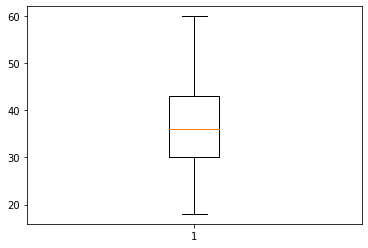

In [19]:
plt.boxplot(dataset.Age)

{'whiskers': [<matplotlib.lines.Line2D at 0x2a36a996688>,
 'caps': [<matplotlib.lines.Line2D at 0x2a36a996888>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a36a996288>],
 'medians': [<matplotlib.lines.Line2D at 0x2a3699b6dc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a3699b63c8>],
 'means': []}

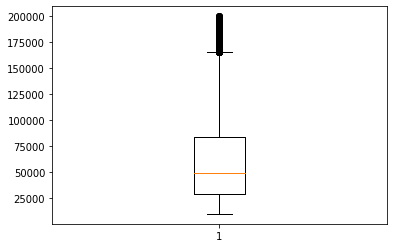

In [20]:
plt.boxplot(dataset.MonthlyIncome)

{'whiskers': [<matplotlib.lines.Line2D at 0x2a36a18e5c8>,
 'caps': [<matplotlib.lines.Line2D at 0x2a36a18eb48>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a36a500e88>],
 'medians': [<matplotlib.lines.Line2D at 0x2a369e54048>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a369bf6c88>],
 'means': []}

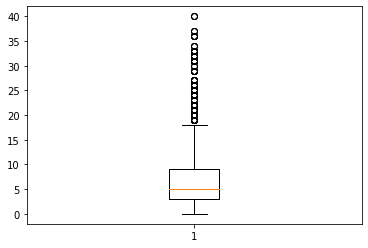

In [21]:
plt.boxplot(dataset.YearsAtCompany)

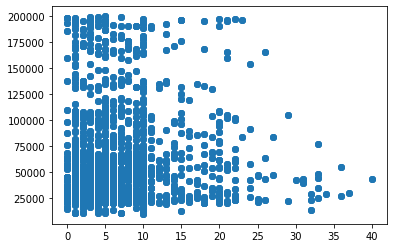

In [23]:
plt.scatter(dataset.YearsAtCompany,dataset.MonthlyIncome)

(array([1410., 1416.,  942.,  228.,  135.,  174.,   48.,   18.,   27.,
          12.]),
 array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36., 40.]),
 <a list of 10 Patch objects>)

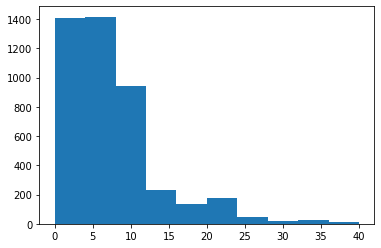

In [24]:
plt.hist(dataset.YearsAtCompany)